#**Global Temperature Anomalies - Monthly Time Series**

> ### 1. **Introduction**



> We started to observe changes in the global climate since, more or less, the inductrial revolution. The impact derived from these temperature fluctuations on the long run has caused what we all see clearly since few decades, the global warming. Global warming is an aspect of climate change, referring to the long-term rise of the planet's temperatures. It is caused by increased concentrations of greenhouse gases in the atmosphere, mainly from human activities such as burning fossil fuels, and farming.

> In this project I am using temperature anomalies recorded since the mid-1700 until today to observe the changes in the global climate and predict anomalies in the near future.





> ### 2. **The Project's Objectives**

> *   Find real records of climate changes data from trusted source(s)
*   Visualize the pattern of data through time
*   Derive conclusions from the observed data
*   Use the observed data to predict the anomalies in the near future



> ### 3. **Initial Data Exploration**

>> #### A. **Data Source(s)**

>>> This analysis is based on the climate changes recorded since 1750 until 2022 from the following source:
http://berkeleyearth.org/data/

>>> The dataset contains a detailed summary of the land-surface average results produced by the Berkeley Averaging method. Temperatures are in Celsius and reported as anomalies relative to the Jan 1951-Dec 1980 average. Uncertainties represent the 95% confidence interval for statistical and spatial under-sampling effects.

>>> The current dataset presented here is described as estimated Global Land-Surface TAVG based on the Complete Berkeley Dataset. This analysis was run on 06-Sep-2022

>>> Results are based on 50498 time series with 21029999 data points.

> ### 4. **ETL**

>> #### A. **Analysis of the Dataset**

>>> Importing few libraries that will help in loading the datased and visualizing it for further analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from keras.preprocessing import sequence
%matplotlib inline

In [ ]:
path = 'https://github.com/cesarhanna/datasets/blob/main/Global_temperature_anomalies.csv?raw=true'

In [ ]:
#Reading the original dataset into a pandas dataframe
original_df = pd.read_csv(path)

In [ ]:
original_df

,Year,Month,Monthly Land Average Temperature Anomaly,Monthly Land Average Temperature Anomaly Uncertainty,Annual Land Average Temperature Anomaly,Annual Land Average Temperature Anomaly Uncertainty,Five-year Land Average Temperature Anomaly,Five-year Land Average Temperature Anomaly Uncertainty,Ten-year Land Average Temperature Anomaly,Ten-year Land Average Temperature Anomaly Uncertainty,Twenty-year Land Average Temperature Anomaly,Twenty-year Land Average Temperature Anomaly Uncertainty
0,1750,1,-1.013,3.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-1.680,3.764,-1.204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,-0.199,NaN,-1.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.534,2.100,-1.248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.891,1.340,-1.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3267,2022,4,1.373,0.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3268,2022,5,1.031,0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3269,2022,6,1.311,0.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3270,2022,7,1.280,0.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Creating the temperature anomaly dataset which will be used later in the x axis in the visualization graph
monthly_avg_temp_anom = original_df['Monthly Land Average Temperature Anomaly']

In [ ]:
#Creating the temperature anomaly dataset which will be used later in the y axis in the visualization graph
year = original_df['Year']

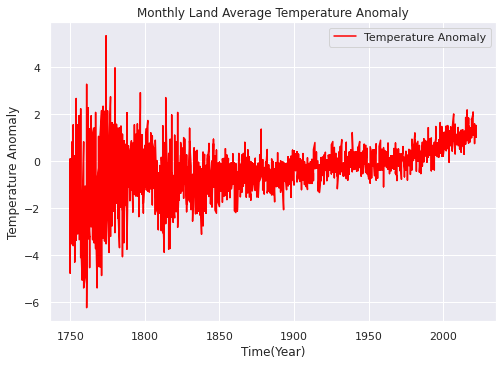

In [ ]:
plt.plot(year, monthly_avg_temp_anom, color = 'red', label = 'Temperature Anomaly')
plt.title('Monthly Land Average Temperature Anomaly')
plt.xlabel('Time(Year)')
plt.ylabel('Temperature Anomaly')
plt.rcParams["figure.figsize"] = (8,5.5)
plt.legend()
plt.show()

>>> In the above graph we see that the frequency between the highest and the lowest anomaly started relatively high in 1750 and began to decrease until around 1850 where from that year onward the frequency normalized.

>>> Further analysis below using Polynomial Regression. The reason I am using Polynomial Regresion is that it shows a better representation of the courviture and trajectory of the anomalies through time as seen in the graph:

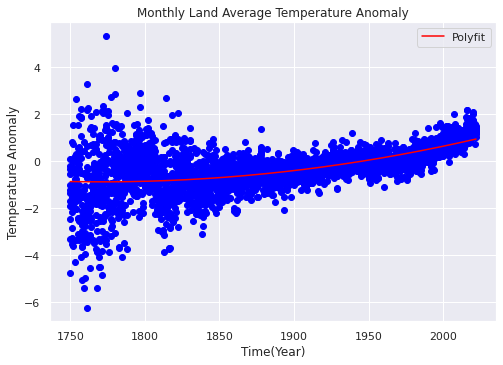

In [ ]:
#Importing the needed libraries:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Removing the 'NaN' values from the anomalies and replacing them with '0':
original_df['Monthly Land Average Temperature Anomaly'] = original_df['Monthly Land Average Temperature Anomaly'].fillna(0)

#Converting the features to float so they can be transformed and fit:
year = original_df['Year'].astype(float)
monthly_avg_temp_anom = original_df['Monthly Land Average Temperature Anomaly'].astype(float)

x = np.array(year)
y = np.array(monthly_avg_temp_anom)

x = x.reshape(-1,1)

#Pre-processing x so it can be fit:
features = PolynomialFeatures(degree=2)
x_transformed = features.fit_transform(x)

#Fitting the Polynomial Regression model:
pr_model = LinearRegression()
pr_model.fit(x_transformed, y)

#Predicting the anomaly values:
y_pred = pr_model.predict(x_transformed)

#Plotting the Polynomial Regression model:
plt.scatter(x, y, c = "blue")
plt.title('Monthly Land Average Temperature Anomaly')
plt.xlabel('Time(Year)')
plt.ylabel('Temperature Anomaly')
plt.rcParams["figure.figsize"] = (8,5.5)
x_sorted = np.sort(x,axis=0)
y_pred_sorted = pr_model.predict(features.fit_transform(x_sorted))
plt.plot(x_sorted,y_pred_sorted, c="red", label='Polyfit')
plt.legend()

>>> Additional analysis on the above graph:

>>> *   The regression line around the anomaly data points is increasing through time, which indicates the increase in the global land temperature.
>>> *   We observe that from 1750 until around 1850 there are quite a lot of outliers.
>>> *   The data points started to get closer to the regression line through time as shown from the year 1750 until 1850 where the frequency started to normalize. I am going to go on a limb here and assume that during those 100 years from 1750 until 1850 they didn't have the right technology to accurately record the anomalies.



>> #### B. **Decision on the Final Dataset**

>>> The decision on the final dataset is based on several factors:


>>> *   As mentioned before, the outliers and the high frequency of anomaly fluctuations between 1750 and 1850.
>>> *   The columns in the original dataset that are not going to be relevant in the model training. We only need to focus here on the monthly average temperature anomaly data points.

>>> Decisions:


>>> *   Remove all the records from year 1750 until 1849 since this inconsistency of data points pattern might impact the model prediction accuracy. 
>>> *   Keep only the monthly anomaly average column since this is the target that I want to predict; the rest of the columns do not have any correlation with the target.





>> #### C. **Creating the Final Dataset**

In [ ]:
#Removing the all the rows from 1750 until end of 1849 inclusive:
index_at_year_1850 = (1850 - 1750) * 12 
df_updated_rows = original_df.drop(original_df.loc[0:index_at_year_1850-1].index)

In [ ]:
#Removing all columns except for 'Monthly Land Average Temperature Anomaly', which is our target:
df_updated_rows_columns = pd.DataFrame(df_updated_rows, columns=['Year', 'Month', 'Monthly Land Average Temperature Anomaly']).reset_index(drop=True)

>>> Final Data Frame:

In [ ]:
df_updated_rows_columns['Monthly Land Average Temperature Anomaly'].fillna(0) #Replacing the 'NaN' values with '0'
final_df = df_updated_rows_columns
final_df = pd.DataFrame(final_df)
final_df

,Year,Month,Monthly Land Average Temperature Anomaly
0,1850,1,-1.922
1,1850,2,-0.171
2,1850,3,-0.552
3,1850,4,-1.151
4,1850,5,-1.381
...,...,...,...
2067,2022,4,1.373
2068,2022,5,1.031
2069,2022,6,1.311
2070,2022,7,1.280


>>> So, let's visualize the final dataset:

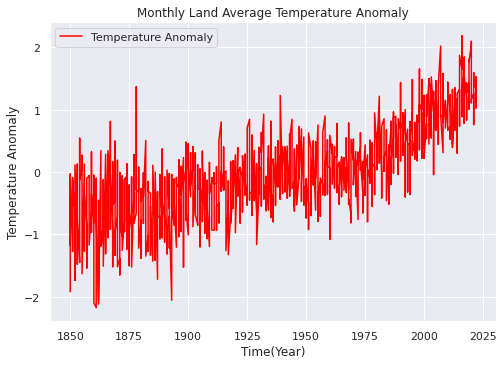

In [ ]:
#Extracting the year and monthly average anomaly for plotting:
year_updated = final_df['Year']
monthly_avg_temp_anom_updated = final_df['Monthly Land Average Temperature Anomaly']

#Plotting the new data for visualization:
plt.plot(year_updated, monthly_avg_temp_anom_updated, color = 'red', label = 'Temperature Anomaly')
plt.title('Monthly Land Average Temperature Anomaly')
plt.xlabel('Time(Year)')
plt.ylabel('Temperature Anomaly')
plt.rcParams["figure.figsize"] = (8,5.5)
plt.legend()
plt.show()

>> #### D. **Defining the Batch and training set size**

>>> As per the market research and analysis, choosing a batch size of 64 for deep learning proved to be performing well and this is because the learning rate and batch size are closely linked.

In [ ]:
#Defining the batch size:
batch_size = 32

>>> Now, let's define the training-set size in which where we divide it by the batch size should give us a remainder of 0:

In [ ]:
#Getting the training set length based on the batch size:
def get_trainingset_length(dataset, batch_size, testset_percentage):
  #Substract test_percent to be excluded from training; reserved for test-set
  length = len(dataset)
  length *= 1 - testset_percentage
  trainingset_length_values = []
  for i in range(int(length) - 50, int(length)):
    remainder = i%batch_size
    if (remainder == 0):
      trainingset_length_values.append(i)
  return (max(trainingset_length_values))

In [ ]:
#Length of the training set:
length = get_trainingset_length(final_df, batch_size, 0.05) #Taking 95% for the training-set and 5% for the test-set thus the '0.05'
print('Length of the training set is:', length)

Length of the training set is: 1952


>>> The last part of the ETL is to increase the boundary of the training-set as this is required to create the sliding window, where we train the timesteps on the left of the window and predict the anomaly for the next timesteps on the right of the window:

In [ ]:
#Defining the timesteps to 12 considering the 12 months of the year:
timesteps = 12

#Increasing the upper boundary of the training set by adding the multiplication of the timesteps by 2:
upper_train = length + timesteps*2
final_df_train = final_df[0:upper_train]
training_set_updated = final_df_train.iloc[:,2:3].values

#Let's see the shape of the updated training set:
training_set_updated.shape

(1976, 1)

>>> Quick explenation on the shape of the traning-set above: the 1944 represents the number of rows or size of the set, and the 1 represents the dimension of the data that we want to train and predict, in this case our target is only one field and that is the monthly average anomaly.

>> #### E. **Scaling the training set**

>>> This step is important to the accuracy of the model. The point is to bring the values of the training set between 0 and 1

In [ ]:
#Training set scaling using MinMaxScaler:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1)) #scaling the data to be in a range from 0 to 1
training_set_updated_scaled = sc.fit_transform(np.float64(training_set_updated))

> ### 5. **Feature Creation**

>> Now, we constrcut the input data (features) and output data (target) with a **sliding window method**.

>> What is a sliding window method anyway? It is the use of prior time steps to predict the next time step. For short, it may be called the window method in some literature. In statistics and time series analysis, this is called a lag or lag method. The number of previous time steps is called the window width or size of the lag.

>> In our case here, since we have only a single variable to train and predict, we have the so called **Univariate** Time Series.

In [ ]:
X_train = [] #input data
y_train = [] #output data

#Creating a data structure with n timesteps:
for i in range(timesteps, length + timesteps): #timesteps = 12
  X_train.append(training_set_updated_scaled[i-timesteps:i,0]) #left side of the sliding window where we train 12 steps of the data (past time data)
  y_train.append(training_set_updated_scaled[i:i+timesteps,0]) #right side of the sliding window where we predict the next 12 steps of the data (future time data)

>> Let's have a look at both X_train and y_train and see how the sliding window looks like. This clearly shows the first 12 data points (left side of the window) belong to X_train and the next 12 data points (right side of the window) belong to y_train, and then the window slides by 1 step each time.

In [ ]:
X_train[:5]

[array([0.06071429, 0.47761905, 0.38690476, 0.24428571, 0.18952381,
        0.38238095, 0.5052381 , 0.51119048, 0.33714286, 0.20357143,
        0.16309524, 0.23833333]),
 array([0.47761905, 0.38690476, 0.24428571, 0.18952381, 0.38238095,
        0.5052381 , 0.51119048, 0.33714286, 0.20357143, 0.16309524,
        0.23833333, 0.48595238]),
 array([0.38690476, 0.24428571, 0.18952381, 0.38238095, 0.5052381 ,
        0.51119048, 0.33714286, 0.20357143, 0.16309524, 0.23833333,
        0.48595238, 0.33880952]),
 array([0.24428571, 0.18952381, 0.38238095, 0.5052381 , 0.51119048,
        0.33714286, 0.20357143, 0.16309524, 0.23833333, 0.48595238,
        0.33880952, 0.21952381]),
 array([0.18952381, 0.38238095, 0.5052381 , 0.51119048, 0.33714286,
        0.20357143, 0.16309524, 0.23833333, 0.48595238, 0.33880952,
        0.21952381, 0.25595238])]

In [ ]:
y_train[:5]

[array([0.48595238, 0.33880952, 0.21952381, 0.25595238, 0.42833333,
        0.425     , 0.49642857, 0.42404762, 0.38142857, 0.45285714,
        0.2152381 , 0.38642857]),
 array([0.33880952, 0.21952381, 0.25595238, 0.42833333, 0.425     ,
        0.49642857, 0.42404762, 0.38142857, 0.45285714, 0.2152381 ,
        0.38642857, 0.43857143]),
 array([0.21952381, 0.25595238, 0.42833333, 0.425     , 0.49642857,
        0.42404762, 0.38142857, 0.45285714, 0.2152381 , 0.38642857,
        0.43857143, 0.30595238]),
 array([0.25595238, 0.42833333, 0.425     , 0.49642857, 0.42404762,
        0.38142857, 0.45285714, 0.2152381 , 0.38642857, 0.43857143,
        0.30595238, 0.1052381 ]),
 array([0.42833333, 0.425     , 0.49642857, 0.42404762, 0.38142857,
        0.45285714, 0.2152381 , 0.38642857, 0.43857143, 0.30595238,
        0.1052381 , 0.29357143])]

>> To just visualize the sliding window, let's take a summarized representation on how the mechanism works:

>> 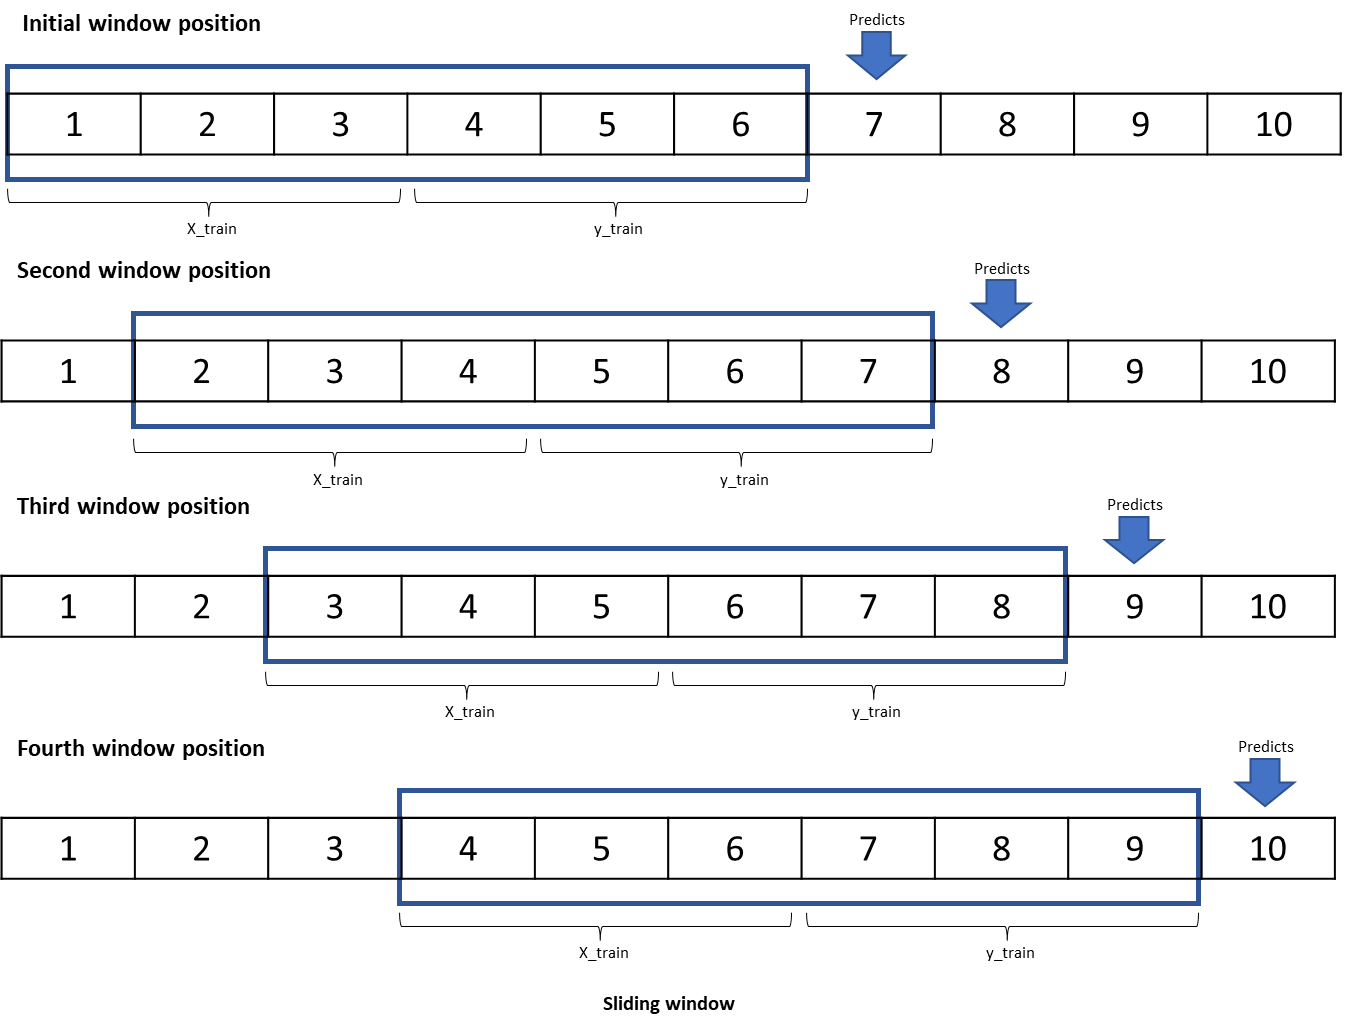

>> Now, we convert both lists, X_train and y_train, to numpy arrays in order to reshape them:

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#Checking the shape of each array:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (1952, 12)
y_train shape: (1952, 12)


>> As you can see, both datasets have 2D dimension; the number of rows in the dataset and the number of features (which is in this case 12 timesteps). However, these datasets are missing the target (average monthky anomaly) which we want to predict, so we need to reshape them to 3D by including the target.

In [ ]:
#Reshaping the X_train and y_train to include the target:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #the '1' at the end represents the number of output or target, which in this case is 1 (average monthly anomaly)
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1)) #the '1' at the end represents the number of output or target, which in this case is 1 (average monthly anomaly)
print('The updated shape of X_train:', X_train.shape)
print('The updated shape of y_train:', y_train.shape)

The updated shape of X_train: (1952, 12, 1)
The updated shape of y_train: (1952, 12, 1)


>> If we want to explain the shapes above, we can say that each matrix has 1920 rows of data, 12 features and 1 target. Great! this is now ready to be trained.

> ### 6. **Model Definition**

>> In order to choose the right machine learning algorithm, two algorithms will be used to train the model for comparison, a non-deep learning and a deep learning, then through a score comparison it will be decided which algorithm to use for this particular case. 

>> Let's start with few machine learning algorithm used in a multi-output regressor. The reason a **multi-output regressor** is used is because of the target has continuous values.

>> A clustering algorithm can't be used here since the target values are of type float and changing that to integer just to train the model will not be considered as best practice and will eventually impact the accuracy of the model. The regression models that will be used with the multi-output regressor are:

>> *   **Ridge Regression**
>> *   **Random Forest Regression**
>> *   **Support Vector Machine**

>> The accuracy measures that will be used are:

>> *   Mean Squared Error
>> *   R2 Score

>> For the depp learning model LSTM will be used

>> Let's first create the test set

In [ ]:
#Creating the test set since we have already created the training set previously:

#Increasing the upper boundary of the test set so we can create the test features later on without having an out of bound error:
length_testset = int(len(final_df)*5/100)
upper_test = length_testset + timesteps*2
final_df_test = final_df[0:upper_test]
test_set = final_df_test.iloc[:,2:3].values

#Let's see the shape of the updated training set:
test_set.shape

(127, 1)

>> Scaling the test set



In [ ]:
#Test set scaling using MinMaxScaler:
sc = MinMaxScaler(feature_range = (0,1)) #scaling the data to be in a range from 0 to 1
test_set_scaled = sc.fit_transform(np.float64(test_set))

>> Creating the test feature and target



In [ ]:
X_test = [] #input data
y_test = [] #output data

#Creating a data structure with n timesteps:
for i in range(timesteps, length_testset + timesteps): #timesteps = 12
  X_test.append(test_set_scaled[i-timesteps:i,0]) #left side of the sliding window where we train 12 steps of the data (past time data)
  y_test.append(test_set_scaled[i:i+timesteps,0]) #right side of the sliding window where we predict the next 12 steps of the data (future time data)

>>> Let's have a quick look at both X_test and y_test datasets:

In [ ]:
X_test[:5]

[array([0.01557508, 0.71485623, 0.56269968, 0.32348243, 0.23162939,
        0.55511182, 0.76118211, 0.77116613, 0.47923323, 0.25519169,
        0.18730032, 0.3134984 ]),
 array([0.71485623, 0.56269968, 0.32348243, 0.23162939, 0.55511182,
        0.76118211, 0.77116613, 0.47923323, 0.25519169, 0.18730032,
        0.3134984 , 0.72883387]),
 array([0.56269968, 0.32348243, 0.23162939, 0.55511182, 0.76118211,
        0.77116613, 0.47923323, 0.25519169, 0.18730032, 0.3134984 ,
        0.72883387, 0.48202875]),
 array([0.32348243, 0.23162939, 0.55511182, 0.76118211, 0.77116613,
        0.47923323, 0.25519169, 0.18730032, 0.3134984 , 0.72883387,
        0.48202875, 0.28194888]),
 array([0.23162939, 0.55511182, 0.76118211, 0.77116613, 0.47923323,
        0.25519169, 0.18730032, 0.3134984 , 0.72883387, 0.48202875,
        0.28194888, 0.34305112])]

In [ ]:
y_test[:5]

[array([0.72883387, 0.48202875, 0.28194888, 0.34305112, 0.6321885 ,
        0.62659744, 0.74640575, 0.625     , 0.55351438, 0.67332268,
        0.27476038, 0.56190096]),
 array([0.48202875, 0.28194888, 0.34305112, 0.6321885 , 0.62659744,
        0.74640575, 0.625     , 0.55351438, 0.67332268, 0.27476038,
        0.56190096, 0.64936102]),
 array([0.28194888, 0.34305112, 0.6321885 , 0.62659744, 0.74640575,
        0.625     , 0.55351438, 0.67332268, 0.27476038, 0.56190096,
        0.64936102, 0.42691693]),
 array([0.34305112, 0.6321885 , 0.62659744, 0.74640575, 0.625     ,
        0.55351438, 0.67332268, 0.27476038, 0.56190096, 0.64936102,
        0.42691693, 0.09025559]),
 array([0.6321885 , 0.62659744, 0.74640575, 0.625     , 0.55351438,
        0.67332268, 0.27476038, 0.56190096, 0.64936102, 0.42691693,
        0.09025559, 0.40615016])]

>> We convert both lists, X_test and y_test, to numpy arrays in order to reshape them



In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
#Checking the shape of each array:
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (103, 12)
y_test shape: (103, 12)


>> We reshape X_test and y_test



In [ ]:
#Reshaping the X_test and y_test to include the target:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) #the '1' at the end represents the number of output or target, which in this case is 1 (average monthly anomaly)
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1], 1)) #the '1' at the end represents the number of output or target, which in this case is 1 (average monthly anomaly)

#Removing the last 7 records from X_test and y_test to be divisible by the number of batches in order to avoid the dimensionality descrepency error later on when we evaluate the model using the test set:
X_test_updated = X_test[0:96]
y_test_updated = y_test[0:96]

#Printing the shapes of the updated sets:
print('The updated shape of X_test_updated:', X_test_updated.shape)
print('The updated shape of y_test_updated:', y_test_updated.shape)

The updated shape of X_test_updated: (96, 12, 1)
The updated shape of y_test_updated: (96, 12, 1)


>>>> Now that we have the test datasets for feature and target ready, we can then start creating and training the model.

>> **Deep Learning Model: Long-Short Term Memory (LSTM)** 

>>> *  Designing and building the LSTM architecture in Keras





In [ ]:
# Importing the Keras libraries and packages in order to start building the LSTM model:

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model

>>>> A functional API will be used instead of 'Sequential' LSTM, since the functional API gives more flexibility.

>>>> MAE (Mean Absolute Error) loss-function will be used to measure the loss after each epoch.

In [ ]:
#Initializing the LSTM with MAE Loss-Function using Functional API:
inputs_1_mae = Input(batch_shape = (batch_size, timesteps, 1))
lstm_1_mae = LSTM(12, stateful=True, return_sequences=True)(inputs_1_mae) # 'return_sequences=True' will return an output for every neuron (in this case 12 neurons), which will be used as input for the next layer
lstm_2_mae = LSTM(12, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae) # 'units = 1' is representing the number of output or target, which in this case is 1 (monthly average anomaly)

regressor_mae = Model(inputs=inputs_1_mae, outputs=output_1_mae)

regressor_mae.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
regressor_mae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(32, 12, 1)]             0         
                                                                 
 lstm_2 (LSTM)               (32, 12, 12)              672       
                                                                 
 lstm_3 (LSTM)               (32, 12, 12)              1200      
                                                                 
 dense_1 (Dense)             (32, 12, 1)               13        
                                                                 
Total params: 1,885
Trainable params: 1,885
Non-trainable params: 0
_________________________________________________________________


>>>> Visualizing the LSTM model per batch processing:

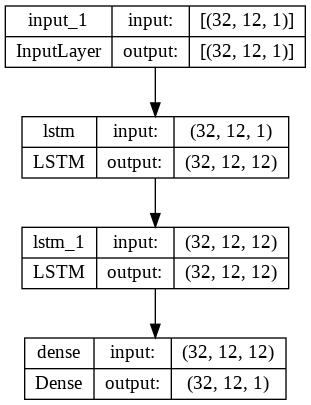

In [ ]:
#Importing the libarary that let's us plot the model:
from keras.utils.vis_utils import plot_model

plot_model(regressor_mae, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

> ### 7. **Model Training**

>>> First let's import few libraries that we are going to use for training

In [73]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

>>> Then let's reshape the train and test arrays in order to fit them

In [ ]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train_reshaped = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))

X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test_reshaped = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))

>> #### A. **Ridge Regression with Multi-output Regressor**

In [65]:
#Creating the Multi-output Regressor with the Ridge Regression model and fitting it:
Rreg = MultiOutputRegressor(Ridge(random_state=123)).fit(X_train_reshaped, y_train_reshaped)
                                                         
#Predict using the test set:
yhat_ridge = Rreg.predict(X_test_reshaped)

>> #### B. **Random Forest Regression with Multi-output Regressor**

In [67]:
#Creating the Multi-output Regressor with the Random Forest Regression model and fitting it:
RFReg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=0)).fit(X_train_reshaped, y_train_reshaped)

#Predict using the test set:
yhat_random_forest = RFReg.predict(X_test_reshaped)

>> #### C. **Support Vector Machine with Multi-output Regressor**

In [74]:
#Creating the Support Vector Machine with the Random Forest Regression model and fitting it:
svm = MultiOutputRegressor(svm.SVR(epsilon=0.2)).fit(X_train_reshaped, y_train_reshaped)

#Predict using the test set:
yhat_svm = svm.predict(X_test_reshaped)

>> #### D. **Training the LSTM model**

In [ ]:
#Defining the number of epochs:
epochs = 130

#We fit our model in every epoch and we print the epoch number:
lstm = regressor_mae.fit(X_train, y_train, shuffle=False, epochs=epochs, batch_size=batch_size, validation_data=(X_train, y_train)) #here we need the 'shuffle' to be False because we have sequences that we are training and predicting, if we put True we will break the order of sequences
regressor_mae.reset_states() #here we reset after each epoch because we don't want to take the state or result of the previous epoch to the next one, we want to start fresh for every epoch

> ### 8. **Model Evaluation**

>> #### A. **Ridge Regression with Multi-output Regressor Evaluation**

In [59]:
#Calculating the mean squared error:
mse = mean_squared_error(y_test_reshaped, yhat_ridge)

#Calculating the R2 score:
score = r2_score(y_test_reshaped, yhat_ridge)

print('Ridge MSE is: ', mse)
print('Ridge R2 Score is: ', score)

Ridge MSE is:  0.039907431427345735
Ridge R2 Score is:  -0.0986165530494168


>>> Let's compare the test set of the final dataframe with the Ridge Regression fitting result by visualizing it

In [60]:
#First, we need to create the average temperature array test set and normalizing it:
length_avg_temp = int(len(final_df['Monthly Land Average Temperature Anomaly'])*95/100)
avg_temp_updated = final_df['Monthly Land Average Temperature Anomaly'][length_avg_temp:-1]
avg_temp_updated_array = np.array(avg_temp_updated)
stds = MinMaxScaler(feature_range = (0,1)) #scaling the data to be in a range from 0 to 1
avg_temp_updated_array_scaled = stds.fit_transform(np.float64(avg_temp_updated_array.reshape(-1, 1)))

In [61]:
#Converting the needed arrays to list in order to create a dataframe later on:
year_updated_list = year_updated.tolist()
avg_temp_updated_scaled_list = avg_temp_updated_array_scaled.tolist()

In [62]:
#Converting the predicted array to list in order to add it to the dataframe:
yhat_ridge_list = yhat_ridge.tolist()

avg_temp = []
yhat_list = []

for i in avg_temp_updated_scaled_list:
  for j in i:
    avg_temp.append(j)

for k in yhat_ridge_list:
  for l in k:
    yhat_list.append(l)

In [63]:
#Creating the necessary dataframe for plotting:
ridge_regression_df = pd.DataFrame(zip(year_updated_list, avg_temp, yhat_list),
              columns=['year', 'true_avg_temp', 'predicted_temp_ridge'])

#Let's have a quick look on the created dataframe:
ridge_regression_df.head()

,year,true_avg_temp,predicted_temp_ridge
0,1850,0.464646,0.335847
1,1850,0.000000,0.410869
2,1850,0.396066,0.405062
3,1850,0.510367,0.417899
4,1850,0.482190,0.456955


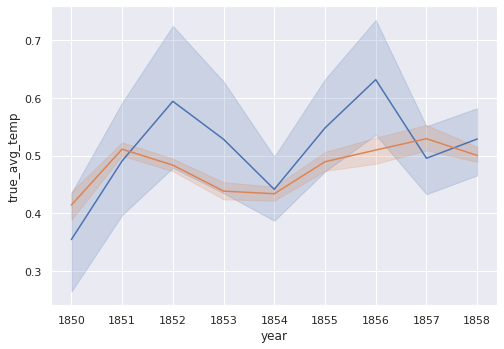

In [64]:
#Visualizing the true values with the predicted using seaborn:
sns.lineplot(x='year', y='true_avg_temp', data=ridge_regression_df)
sns.lineplot(x='year', y='predicted_temp_ridge', data=ridge_regression_df)
plt.show()

>> #### B. **Random Forest Regressor with Multi-output Regressor Evaluation**

In [66]:
#Calculating the mean squared error:
mse = mean_squared_error(y_test_reshaped, yhat_random_forest)

#Calculating the R2 score:
score = r2_score(y_test_reshaped, yhat_random_forest)

print('Random Forest MSE is: ', mse)
print('Random Forest R2 Score is: ', score)

Random Forest MSE is:  0.04223059999308427
Random Forest R2 Score is:  -0.1625224368160085


>>> Let's compare the test set of the final dataframe with the Random Forest fitting result by visualizing it

In [68]:
#Converting the predicted array to list in order to add it to the dataframe:
yhat_rf_list = yhat_random_forest.tolist()

yhat_list = []

for k in yhat_rf_list:
  for l in k:
    yhat_list.append(l)

In [69]:
#Creating the necessary dataframe for plotting:
rf_regression_df = pd.DataFrame(zip(year_updated_list, avg_temp, yhat_list),
              columns=['year', 'true_avg_temp', 'predicted_temp_rf'])

#Let's have a quick look on the created dataframe:
rf_regression_df.head()

,year,true_avg_temp,predicted_temp_rf
0,1850,0.464646,0.337376
1,1850,0.000000,0.422355
2,1850,0.396066,0.411138
3,1850,0.510367,0.337831
4,1850,0.482190,0.422695


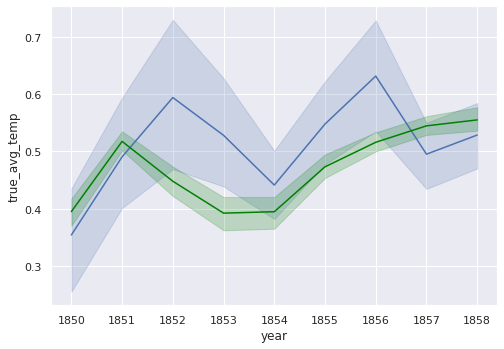

In [70]:
#Visualizing the true values with the predicted using seaborn:
sns.lineplot(x='year', y='true_avg_temp', data=rf_regression_df)
sns.lineplot(x='year', y='predicted_temp_rf', data=rf_regression_df, color='green')
plt.show()

>> #### C. **Support Vector Machine with Multi-output Regressor Evaluation**

In [71]:
#Calculating the mean squared error:
mse = mean_squared_error(y_test_reshaped, yhat_svm)

#Calculating the R2 score:
score = r2_score(y_test_reshaped, yhat_svm)

print('Support Vector Machine MSE is: ', mse)
print('Support Vector Machine R2 Score is: ', score)

Support Vector Machine MSE is:  0.04760080942126291
Support Vector Machine R2 Score is:  -0.3110956085726821


>>> Let's compare the test set of the final dataframe with the Support Vector Machine fitting result by visualizing it

In [75]:
#Converting the predicted array to list in order to add it to the dataframe:
yhat_svm_list = yhat_svm.tolist()

yhat_list = []

for k in yhat_svm_list:
  for l in k:
    yhat_list.append(l)

In [76]:
#Creating the necessary dataframe for plotting:
svm_regression_df = pd.DataFrame(zip(year_updated_list, avg_temp, yhat_list),
              columns=['year', 'true_avg_temp', 'predicted_temp_svm'])

#Let's have a quick look on the created dataframe:
svm_regression_df.head()

,year,true_avg_temp,predicted_temp_svm
0,1850,0.464646,0.414421
1,1850,0.000000,0.422682
2,1850,0.396066,0.376660
3,1850,0.510367,0.407020
4,1850,0.482190,0.361219


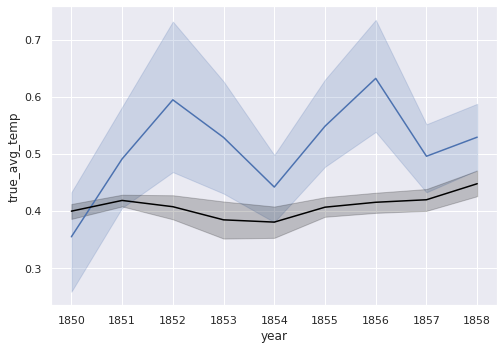

In [77]:
#Visualizing the true values with the predicted using seaborn:
sns.lineplot(x='year', y='true_avg_temp', data=svm_regression_df)
sns.lineplot(x='year', y='predicted_temp_svm', data=svm_regression_df, color='black')
plt.show()

>>> Let's visualize how all 3 non-deep learning models compare to each other in terms of performance:

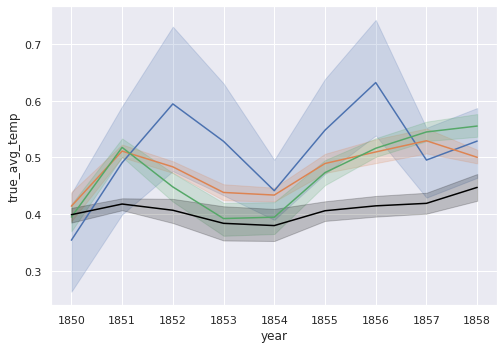

In [78]:
sns.lineplot(x='year', y='true_avg_temp', data=svm_regression_df)
sns.lineplot(x='year', y='predicted_temp_ridge', data=ridge_regression_df)
sns.lineplot(x='year', y='predicted_temp_rf', data=rf_regression_df)
sns.lineplot(x='year', y='predicted_temp_svm', data=svm_regression_df, color='black')

>>> Quick analysis of the graph above and the Regression models performence in  general:
>>> *   The blue line represents the true values from the test set
>>> *   The orange line represents the predicted values using Ridge Regression
>>> *   The greenline represents the predicted values using Random Forest
>>> *   The black line represents the predicted values using SVM
>>> *   Ridge Regression and Random Forest got pretty close results
>>> *   We clearly see that all the non-deep learning regression models are poorly performing, especially SVM, thus non of these models will be used to train the dataset

>>> Since none of the regression models performed well, let's see if the deep learning LSTM model performs as expected:

>> #### D. **LSTM Evaluation**

>>> Let's check the loss performence:

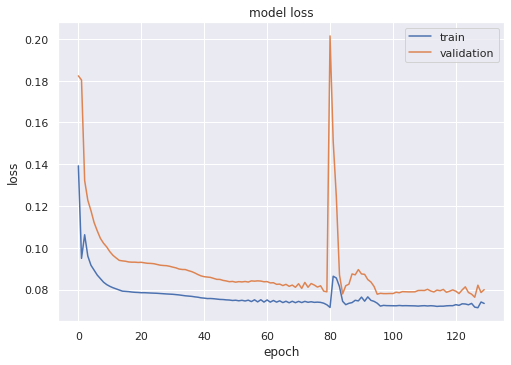

In [ ]:
plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

>>>> The loss performence looks pretty good! It is a normal behavior that the loss line will start higher than the train line as the training is just starting, however, it drops and goes more in parallel frequency with the train line which indicates that the model is not overfitting. It is not underfitting either as the validation line is is still above the train line.

>>> Now, let's have a look at the accuracy:

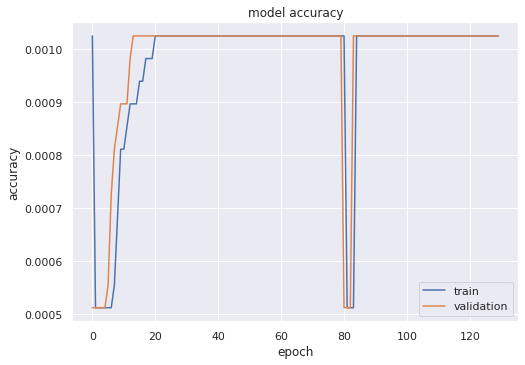

In [ ]:
plt.plot(lstm.history['accuracy'])
plt.plot(lstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

>>>> The accuracy looks very good as well! It starts at a low accuracy which is normal as we just started to train the model, but then it goes in parallel with the train data as the training progresses.

>>> **The LSTM is showing good performence which will be used as our training algorithm for this product.**